In [19]:
# Moving Averages Code

import numpy as np
from pandas import Series, DataFrame
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
#load VST Ind data for a year 
data = pd.read_csv('D:/NLP Course/SMA/30-12-2019-TO-02-12-2020VSTINDALLN.csv')

In [21]:
data.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VSTIND,EQ,30-Dec-2019,4199.15,4228.00,4269.80,4201.00,4232.00,4235.30,4244.08,1372,5822874.4,540,912,66.47
1,VSTIND,EQ,31-Dec-2019,4235.30,4278.00,4295.95,4200.00,4205.10,4214.45,4236.63,749,3173233.2,398,393,52.47
2,VSTIND,EQ,01-Jan-2020,4214.45,4202.05,4294.00,4202.05,4270.15,4275.60,4247.16,1067,4531715.9,469,583,54.64
3,VSTIND,EQ,02-Jan-2020,4275.60,4300.00,4414.65,4215.05,4309.85,4286.80,4319.19,4924,21267671.5,1429,2003,40.68
4,VSTIND,EQ,03-Jan-2020,4286.80,4289.00,4300.00,4240.00,4260.00,4252.95,4259.51,1899,8088807.0,726,1454,76.57


In [22]:
# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close Price'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

In [23]:
# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close Price'].ewm(span = ndays, min_periods = ndays - 1).mean(), name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

In [24]:
close = data['Close Price']

# Compute the 50-day SMA for stock
n = 50
SMA_STOCK = SMA(data,n)
SMA_STOCK = SMA_STOCK.dropna()
SMA = SMA_STOCK['SMA']

In [25]:
# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_STOCK = EWMA(data,ew)
EWMA_STOCK = EWMA_STOCK.dropna()
EWMA = EWMA_STOCK['EWMA_200']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

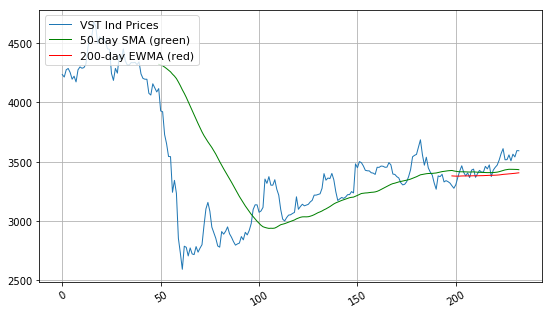

In [26]:
plots = plt

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close Price'],lw=1, label='VST Ind Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [29]:
dt = data[data['Close Price'] < 2700]

In [30]:
dt

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
61,VSTIND,EQ,25-Mar-2020,2728.95,2750.0,2750.0,2536.05,2616.05,2592.0,2632.46,14407,37925919.45,3250,10975,76.18


In [31]:
# Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data['Close Price'].rolling(window=n).mean()
    SD = data['Close Price'].rolling(window=n).std()
    data['UpperBB'] = MA + (2 * SD) 
    data['LowerBB'] = MA - (2 * SD)
    return data

     Symbol Series         Date  Prev Close  Open Price  High Price  \
0    VSTIND     EQ  30-Dec-2019     4199.15     4228.00     4269.80   
1    VSTIND     EQ  31-Dec-2019     4235.30     4278.00     4295.95   
2    VSTIND     EQ  01-Jan-2020     4214.45     4202.05     4294.00   
3    VSTIND     EQ  02-Jan-2020     4275.60     4300.00     4414.65   
4    VSTIND     EQ  03-Jan-2020     4286.80     4289.00     4300.00   
5    VSTIND     EQ  06-Jan-2020     4252.95     4269.95     4269.95   
6    VSTIND     EQ  07-Jan-2020     4196.35     4219.95     4296.35   
7    VSTIND     EQ  08-Jan-2020     4221.65     4160.05     4215.90   
8    VSTIND     EQ  09-Jan-2020     4173.40     4199.90     4285.95   
9    VSTIND     EQ  10-Jan-2020     4275.50     4275.55     4346.25   
10   VSTIND     EQ  13-Jan-2020     4299.85     4324.00     4324.00   
11   VSTIND     EQ  14-Jan-2020     4288.70     4289.00     4316.40   
12   VSTIND     EQ  15-Jan-2020     4294.10     4309.00     4346.90   
13   V

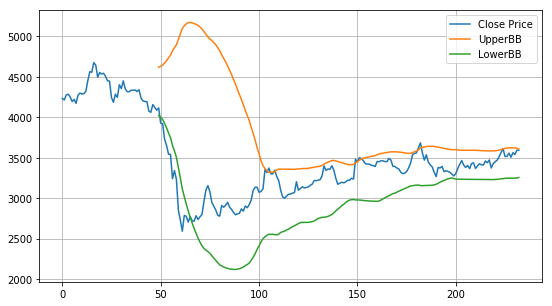

In [33]:
# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
STOCK_BBANDS = BBANDS(data, n)
print(STOCK_BBANDS)

# Create the plot
Data = pd.concat([STOCK_BBANDS['Close Price'],STOCK_BBANDS.UpperBB,STOCK_BBANDS.LowerBB],axis=1)
Data.plot(figsize=(9,5),grid=True)

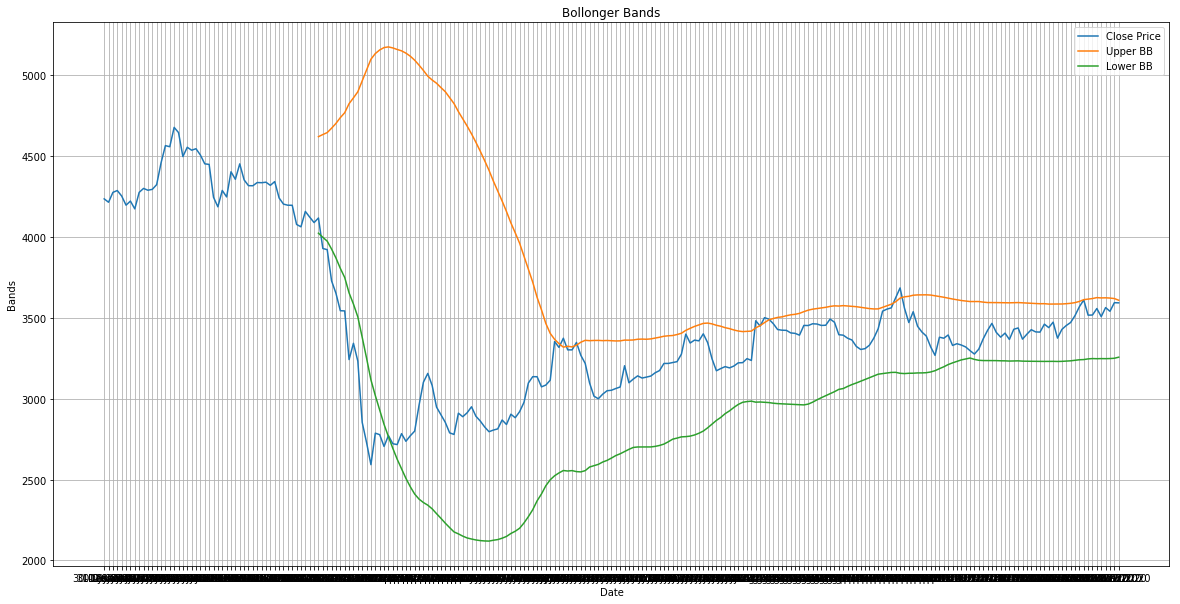

In [46]:
fig, ax = plt.subplots()

ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['Close Price'],label = 'Close Price' )
ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['UpperBB'],label = 'Upper BB' )
ax.plot(STOCK_BBANDS['Date'],STOCK_BBANDS['LowerBB'],label = 'Lower BB' )

ax.set_xlabel('Date')
ax.set_ylabel('Bands')
ax.set_title('Bollonger Bands')

fig.set_size_inches(20,10)
plt.grid() #put grid in background
ax.legend()    #shows the legends